<a href="https://colab.research.google.com/github/jayeshagrawal17/sentiment-analysis-/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
df = pd.read_csv('/content/customer_reviews.csv')

In [12]:
df.dropna(subset=['Review Text'], inplace=True)

df['clean_text'] = df['Review Text'].str.lower()

df['clean_text'] = df['clean_text'].str.replace('[^\w\s]', '')

df['tokens'] = df['clean_text'].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))

df.drop(columns=['tokens'], inplace=True)

print(df.head())

<ipython-input-12-5305e4f21b8d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace('[^\w\s]', '')


   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1     

In [15]:
sid = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

df['sentiment_score'] = df['clean_text'].apply(get_sentiment_scores)

def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

print(df.head())


   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1     

In [16]:
positive_feedback = df[df['sentiment'] == 'positive']['clean_text']
negative_feedback = df[df['sentiment'] == 'negative']['clean_text']

positive_words = [word for feedback in positive_feedback for word in word_tokenize(feedback)]
negative_words = [word for feedback in negative_feedback for word in word_tokenize(feedback)]

positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

top_positive_words = positive_word_freq.most_common(10)

top_negative_words = negative_word_freq.most_common(10)

print("Top words in positive feedback:")
for word, freq in top_positive_words:
    print(f"{word}: {freq}")

print("\nTop words in negative feedback:")
for word, freq in top_negative_words:
    print(f"{word}: {freq}")

Top words in positive feedback:
dress: 10904
fit: 9912
size: 9019
love: 8888
top: 8077
like: 6793
color: 6716
look: 6616
wear: 6336
great: 6029

Top words in negative feedback:
dress: 330
size: 236
look: 201
like: 185
fabric: 172
back: 165
top: 158
im: 149
color: 149
fit: 147


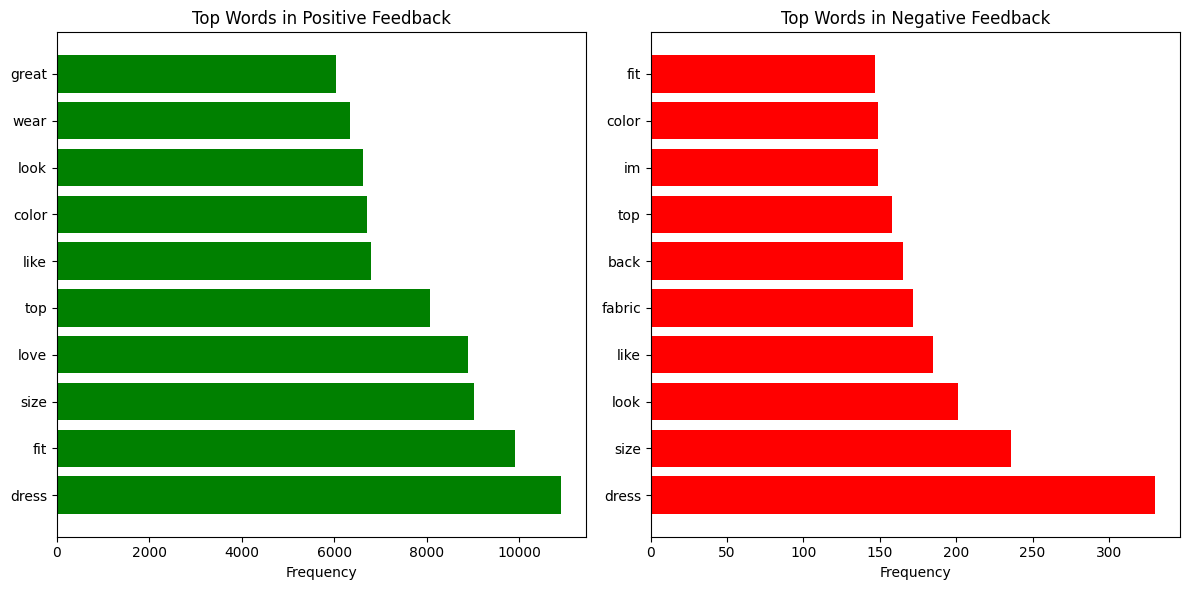

In [17]:
top_positive_words = positive_word_freq.most_common(10)
positive_words, positive_freq = zip(*top_positive_words)

top_negative_words = negative_word_freq.most_common(10)
negative_words, negative_freq = zip(*top_negative_words)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(positive_words, positive_freq, color='green')
plt.xlabel('Frequency')
plt.title('Top Words in Positive Feedback')

plt.subplot(1, 2, 2)
plt.barh(negative_words, negative_freq, color='red')
plt.xlabel('Frequency')
plt.title('Top Words in Negative Feedback')

plt.tight_layout()
plt.show()
